### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('diabetes.csv')

In [40]:
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [41]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X, X_test, y, y_test = train_test_split(X, y, stratify=y, test_size=0.05, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
tree = DecisionTreeClassifier(max_depth=3)
random_forest = RandomForestClassifier(max_depth=2)

In [46]:
tree.fit(X_train, y_train)
print(f'Acurácia de treino: {tree.score(X_train, y_train)}')
print(f'Acurácia de validacao: {tree.score(X_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de validacao: 0.776595744680851


In [47]:
random_forest.fit(X_train, y_train)
print(f'Acurácia de treino: {random_forest.score(X_train, y_train)}')
print(f'Acurácia de validacao: {random_forest.score(X_val, y_val)}')

Acurácia de treino: 0.7321428571428571
Acurácia de validacao: 0.6914893617021277


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

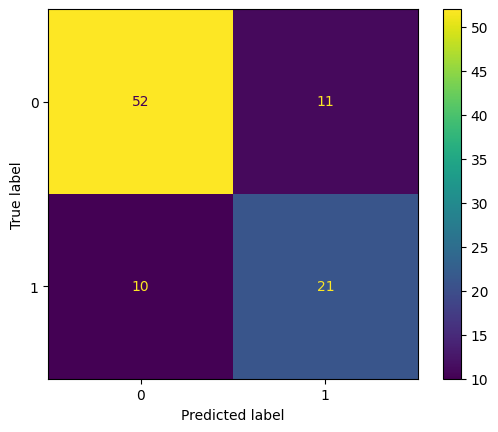

In [49]:
tree_predict = tree.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, tree_predict);

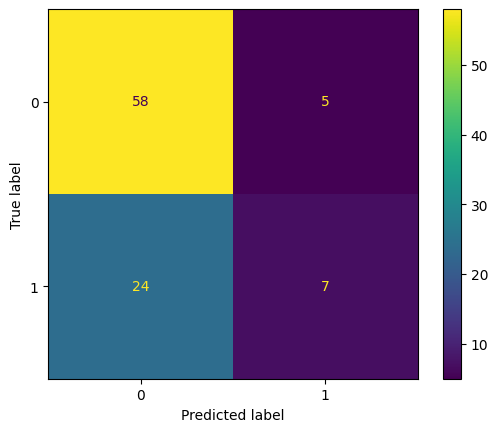

In [50]:
rf_predict = random_forest.predict(X_val)
ConfusionMatrixDisplay.from_predictions(y_val, rf_predict)

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [52]:
tree_predict = tree.predict(X_val)
print(f'Acurácia (Decision Tree): {accuracy_score(y_val, tree_predict)}')
print(f'Reccall (Decision Tree): {recall_score(y_val, tree_predict)}')
print(f'Precisão (Decision Tree): {precision_score(y_val, tree_predict)}')
print(f'F1_score (Decision Tree): {f1_score(y_val, tree_predict)}')

Acurácia (Decision Tree): 0.776595744680851
Reccall (Decision Tree): 0.6774193548387096
Precisão (Decision Tree): 0.65625
F1_score (Decision Tree): 0.6666666666666666


In [54]:
rf_predict = random_forest.predict(X_val)
print(f'Acurácia (Random Forest): {accuracy_score(y_val, rf_predict)}')
print(f'Reccall (Random Forest): {recall_score(y_val, rf_predict)}')
print(f'Precisão (Random Forest): {precision_score(y_val, rf_predict)}')
print(f'F1_score (Random Forest): {f1_score(y_val, rf_predict)}')

Acurácia (Random Forest): 0.6914893617021277
Reccall (Random Forest): 0.22580645161290322
Precisão (Random Forest): 0.5833333333333334
F1_score (Random Forest): 0.32558139534883723


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [55]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

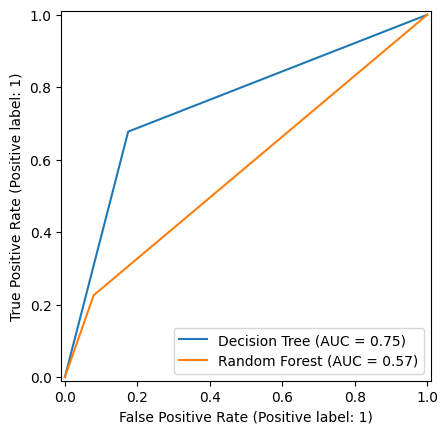

In [58]:
cruva_ROC = RocCurveDisplay.from_predictions(y_val, tree_predict, name='Decision Tree')
cruva_ROC = RocCurveDisplay.from_predictions(y_val, rf_predict, name='Random Forest', ax=cruva_ROC.ax_)

In [59]:
print(f'AUC (Decision Tree): {roc_auc_score(y_val, tree_predict)}')
print(f'AUC (Random Forest): {roc_auc_score(y_val, rf_predict)}')

AUC (Decision Tree): 0.7514080901177674
AUC (Random Forest): 0.573220686123912


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [60]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

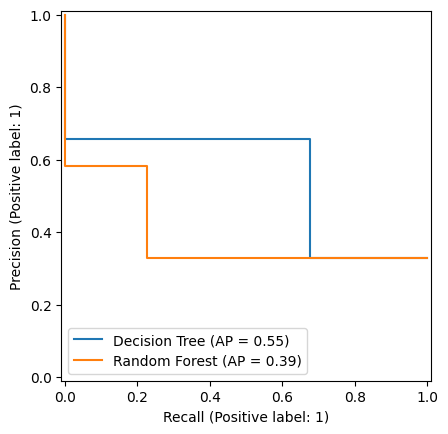

In [61]:
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, tree_predict, name='Decision Tree')
curva_precision_recall = PrecisionRecallDisplay.from_predictions(y_val, rf_predict, name='Random Forest', ax=curva_precision_recall.ax_)

In [62]:
print(f'AP (Decision Tree): {average_precision_score(y_val, tree_predict)}')
print(f'AP (Random Forest): {average_precision_score(y_val, rf_predict)}')

AP (Decision Tree): 0.5509394303363074
AP (Random Forest): 0.38703957904369707


### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [63]:
from sklearn.metrics import classification_report

In [65]:
print('Decision Tree')
print(classification_report(y_val, tree_predict))
print('Random Forest')
print(classification_report(y_val, rf_predict))

Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94

Random Forest
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        63
           1       0.58      0.23      0.33        31

    accuracy                           0.69        94
   macro avg       0.65      0.57      0.56        94
weighted avg       0.67      0.69      0.64        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.